In [0]:
%sh
pip install beautifulsoup4

Requirement already satisfied: beautifulsoup4 in /databricks/python3/lib/python3.8/site-packages (4.9.3)
Requirement already satisfied: soupsieve>1.2; python_version >= "3.0" in /databricks/python3/lib/python3.8/site-packages (from beautifulsoup4) (2.2.1)
WARNING: You are using pip version 20.2.4; however, version 21.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
%sh
pip install lxml

Requirement already satisfied: lxml in /databricks/python3/lib/python3.8/site-packages (4.6.3)
WARNING: You are using pip version 20.2.4; however, version 21.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
from bs4 import BeautifulSoup

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
with open("/dbfs/FileStore/tables/API_NY_GNP_MKTP_PC_CD_DS46_en_xml_v2_2303962-1.xml") as fp:
  soup = BeautifulSoup(fp)

In [0]:
data_dictionary = {'Country or Area':[], 'Year':[], 'Item':[], 'Value':[]}

for record in soup.find_all('record'):
  for record in record.find_all('field'):
    data_dictionary[record['name']].append(record.text)
    
df = pd.DataFrame.from_dict(data_dictionary)
df = df.pivot(index='Country or Area', columns='Year', values='Value')
df.reset_index(level=0, inplace=True)

In [0]:
display(df)

Country or Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Afghanistan,,,,,,,,,,,,,,,,,,,,436.826860989416,544.260065037087,590.518169999352,642.882195510742,639.388564512313,613.785652385012,583.69585593898,514.293114271805,526.726154300307,498.881482609395,515.164559368834
Albania,616.652320280708,329.944388154053,190.042370963492,377.783404126391,590.718709083414,764.281661938536,1032.6415764172,733.374997515199,838.42819238184,1057.39162032858,1161.12101517968,1330.25744466619,1466.90166151345,1902.68421814604,2431.59178308901,2731.58551743869,3060.63532874132,3695.14432751251,4389.13480570284,4048.42939057647,4053.25642571345,4438.21543831371,4216.23395165702,4489.1551374331,4620.96676829123,3999.37956322554,4191.20822468344,4542.86721633724,5278.38344216565,5282.56376341776
Algeria,2320.64902884872,1635.11264555683,1696.12051615834,1744.00423583686,1446.37666004846,1376.11615698048,1516.46561491707,1545.16675828037,1529.76265605758,1513.56711943686,1677.72178311149,1686.87350840151,1711.8210765423,2019.69762710427,2499.83468888537,2959.60989006709,3340.93263054883,3888.7972334029,4888.41000457192,3845.9823792123,4468.50159762034,5404.60775795187,5487.6348261842,5380.10141953324,5370.52028488024,4075.49811853855,3906.88395535905,4048.67076020214,4049.0651541254,3876.41001686534
American Samoa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Andorra,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Angola,846.253487007803,865.69272959239,276.362844614739,247.612622743932,143.906652704244,342.160020082073,404.81851313738,452.583113930496,360.521230491038,301.31293933776,454.316555272224,435.216802416516,779.189081750469,887.688242020688,1122.89806061036,1695.00374123885,2292.97114338239,2758.49888387067,3448.66951105581,2819.7225251601,3241.6439618359,4215.09408587855,4685.01784695553,4874.34188157136,5079.92803234544,3955.12132423067,3323.22860237694,3844.08811789204,3035.52112098076,2554.55284211201
Antigua and Barbuda,6623.34385306494,7093.71451082436,7284.12487497968,7787.4794690703,8375.54863356899,8015.46850476514,8657.33417569594,9183.07155755555,9652.87640967746,9946.63222560483,10285.3541554604,10046.2795075031,9872.08350185552,10311.4754098361,10887.3269305952,12041.0328452801,13432.4776265916,14996.4517155625,15328.2472842528,13574.2205212152,12734.353463292,12353.3318311533,12834.1405702399,12487.3039808461,12845.211667141,13386.0437812043,14170.3745568837,14558.170938239,15863.1645645409,16291.6098103183
Arab World,2058.10370841202,1920.73118723308,2023.24523064147,2005.22321554132,1989.04499760709,2103.9922696914,2254.11229849557,2331.92900586904,2223.60301640535,2322.25103235825,2561.39984903159,2480.40962386221,2457.53653259487,2704.78101638977,3124.05393202609,3742.49573869105,4374.02452010945,5005.43042176322,6176.40724258403,5174.87560854763,5897.32156566448,6811.63884316192,7423.01908119183,7499.0990143746,7455.03410443519,6423.31067013304,6152.54135922349,6151.16386874773,6609.29573908044,6597.71567072865
Argentina,4143.33588014254,5558.12946753313,6696.54320079364,6880.86249888506,7375.68474623134,7274.65412911445,7565.25198024625,8038.75131883457,8084.14415821843,7570.06690502138,7503.39201872746,7001.08392738509,2461.76972923157,3214.98572384885,3802.39256947278,4529.18727072221,5722.45734194196,7054.07145757332,8795.47003805883,7970.24181200883,10029.306306376,12483.5582639325,12753.098962023,12768.313688847,12062.6167694811,13508.4194130991,12510.5428216185,14241.1414047646,11215.0368809049,9515.38720859949
Armenia,614.399459331155,589.454578522998,308.847421148435,356.816730420325,399.290996979939,468.658860582369,518.176892444005,554.308275630626,628.092124060973,615.223353746874,641.95390598818,715.271852157377,810.390302090194,960.90185846092,1241.35790320312,1712.85326748905,2260.238199235,3308.89414398634,4248.60521626569,3118.57040889496,3377.64639155776,3650.98076544911,3828.52962974579,4073.74309912898,4165.53922961431,375

In [0]:
cols = df.columns.drop('Country or Area')

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df.dtypes

Out[396]: Year
Country or Area object
1990 float64
1991 float64
1992 float64
1993 float64
1994 float64
1995 float64
1996 float64
1997 float64
1998 float64
1999 float64
2000 float64
2001 float64
2002 float64
2003 float64
2004 float64
2005 float64
2006 float64
2007 float64
2008 float64
2009 float64
2010 float64
2011 float64
2012 float64
2013 float64
2014 float64
2015 float64
2016 float64
2017 float64
2018 float64
2019 float64
dtype: object

In [0]:
new_df = df.sort_values(by='2019',ascending=False)

display(new_df)

Country or Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Bermuda,27128.073087685,27937.5137662866,28703.8143186279,30935.1553216771,31511.1277815239,34027.8863856995,null,null,null,null,null,null,null,null,null,null,null,107334.81662346699,109665.44311462,103569.324165853,104119.832934095,100276.76414100699,102805.904503225,104065.352840726,102211.13635665801,105672.072596839,109920.113393438,116407.22997197599,116696.49561952401,118512.15893295
Switzerland,39246.6160496826,39251.5014876496,40298.5805611522,39014.0217595914,42494.3856672594,49838.18044680519,47925.686858235706,42206.6888231069,43502.026462233,42853.081192478596,40386.3418924566,40070.3096827969,42477.946737442406,51247.0713471311,56652.5472147642,59563.7091363987,61875.3419571416,63941.668893798895,67752.7523562093,71257.9744345638,78987.2512351945,89435.43877760439,85407.2218692203,86908.1688363022,86978.30415603031,83901.6761577227,80360.8615128353,79140.3131572735,83042.8747254576,83607.3638792947
Norway,27452.784619909904,27698.3280959804,29889.7369102125,27339.3046366265,28833.584785429,34460.3337394454,36905.6782282007,36251.745530939304,34404.161327961,36072.3672298219,37641.2079018194,38583.34457834,43190.898447614796,50418.1202146206,57678.6910924717,67506.3863829699,74167.1890608516,84907.4548968743,96568.67796105,80510.68830118679,88706.5321135323,101657.40247855801,102503.777499899,104155.89520148699,100268.359481145,77611.5666799303,73938.6718914394,78845.6263653288,85222.31142332009,78557.5511633666
Luxembourg,33560.1531262797,36114.5070674048,39766.7609755107,39504.646518649,41730.0880606921,49984.2862149167,49341.1144354779,45322.7057598947,44720.4446395303,47175.821900611394,43184.1796948991,43349.9766355347,44752.475005276,53366.46155893111,69332.8822294002,74146.0817167909,73047.24877205401,91771.5272206192,94402.3293910182,69897.1453930758,75708.1944841122,79927.989365105,74226.849120555,75888.622975828,78931.40320186129,66044.69652141491,66390.50271169441,69396.0864368608,74312.2351266632,73340.3265702515
Iceland,24836.9289959619,26416.8550690653,26840.6136996463,23290.8202359677,23562.637041464703,26202.744309201098,27364.1611876006,27487.347092108703,30414.802254675098,31747.0310000349,30896.715196331403,27925.038376675802,32461.549627021603,39162.3272645192,45659.375486995996,53981.349399548206,52626.8756328068,65014.7392815525,44337.577571650305,33136.6613637106,34965.8133169935,40272.736512229196,40173.4534284764,47218.048398775194,51612.0916475623,50009.22587465,59106.394144484504,69790.1594513909,70666.7204552738,68321.582018958
United States,23644.8163831057,24099.6359410391,25088.17842301,25907.178774926,27250.2565310916,28446.552099685297,29866.6896812847,31502.099707691297,33117.0256730009,34723.889048165096,36801.0003997308,37701.3313608144,38433.0902474179,39744.752515954104,42055.2089873729,44565.0161262177,47164.589283745096,48279.2475083765,48289.6855638365,46936.259198942804,48902.9307116172,50816.426537904,53119.8368905505,54355.1886783571,56730.85710115,58335.2019940495,58974.0716077046,61018.951984814295,63783.72890366559,66079.8331101645
North America,23361.044774972797,23807.9372761808,24606.7330849763,25276.291896225,26465.1078576075,27612.4008447037,28954.7487430033,30493.2634928077,31863.2369453948,33438.9609505834,35517.9953613478,36281.5848222375,36987.7350976195,38559.9656282082,41022.037726226205,43697.3881065839,46456.89672540691,47869.8189448615,48078.3282212615,46279.0976814971,48687.317068320495,50866.0292983318,52992.022819709404,54114.156317981,56072.1801697732,56799.418920815595,57256.9037826533,59371.5103380175,61951.3038427933,63996.586665632596
Ireland,13046.369540778602,13152.1775709244,14485.0505954534,13570.1466116164,14791.2991801531,17520.4547259176,19156.2908684166,20373.1251892634,21761.5417501882,22919.473691205498,22872.415390507,24108.6320693316,27281.0475736162,35438.253572286,41108.

In [0]:
first_10 = new_df.loc[:,['Country or Area','2019']].head(10)
display(first_10)

Country or Area,2019
Bermuda,118512.15893295
Switzerland,83607.3638792947
Norway,78557.5511633666
Luxembourg,73340.3265702515
Iceland,68321.582018958
United States,66079.8331101645
North America,63996.586665632596
Ireland,62499.1834382705
Denmark,61991.784677145595
Qatar,60531.031084917806


In [0]:
paises = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico']

paises_df = df.loc[df['Country or Area'].isin(paises)]

display(paises_df)

Country or Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Argentina,4143.335880142539,5558.12946753313,6696.54320079364,6880.86249888506,7375.68474623134,7274.6541291144495,7565.25198024625,8038.75131883457,8084.14415821843,7570.066905021379,7503.39201872746,7001.083927385091,2461.7697292315697,3214.9857238488503,3802.3925694727795,4529.18727072221,5722.45734194196,7054.07145757332,8795.47003805883,7970.24181200883,10029.306306376,12483.5582639325,12753.098962023001,12768.313688847,12062.616769481101,13508.4194130991,12510.542821618501,14241.1414047646,11215.0368809049,9515.387208599492
Brazil,3017.8662645438203,3886.3022080784203,2547.93176920587,2723.2579786384804,3368.9431764791602,4677.56786188688,5026.9931125206895,5113.4751720514705,4862.23722532338,3296.6744446926195,3641.76726908195,3054.3030578949397,2734.36536475612,2973.45699492447,3529.99829206081,4651.96012424816,5739.161970604089,7191.952437213299,8614.48312169678,8407.66515585112,10937.608483353,12905.243379978001,12061.387279165501,12129.4097561722,11886.878076398101,8648.14857805616,8525.308461097231,9739.76966487227,8746.72558949515,8486.01050204298
Chile,2361.99029167827,2658.33972437621,3210.22962017573,3412.8044226868396,3844.0755262860207,4913.3731699052505,5178.03173545721,5568.744459381639,5324.02557787367,4816.191800495189,4896.55097357389,4423.257234799749,4273.863921970779,4482.250704718521,5686.918856600771,6940.93981134629,8316.4146105304,9330.924754482521,9914.80221816815,9512.34899136695,11904.151256212099,13751.8246232711,14627.2994679102,15041.5868136684,14108.8771270948,13165.2577005405,13324.420364108899,14379.0492836757,15239.9665288801,14297.8167475629
Colombia,1375.6966763496,1394.80787858025,1631.53990552778,1837.8163255342397,2243.1580873144,2496.0849458105604,2564.9050651751104,2765.7339001174105,2521.82913990397,2175.22823847982,2466.06077304863,2379.47323052428,2332.2516671944395,2203.4818589699303,2686.02933338733,3328.66858562306,3642.7823394335796,4571.11267819551,5283.42526115976,5033.69838429552,6104.7928488955395,7021.49651524685,7743.708731750741,7929.9375154381005,7873.243875370241,6088.521090210121,5807.20938758624,6260.183536680451,6546.9264149681,6227.6041033328
Mexico,3009.5097573968396,3561.28398098567,4060.43283253377,5518.88254533707,5714.037503206109,3782.4894192411602,4261.99011672419,5153.85351201283,5340.70395955961,6023.73914979234,7004.15128558288,7404.660965578441,7462.11024549212,6949.6573742194105,7373.055760176479,8104.85539045672,8928.93642245072,9480.50306568288,9875.284417527879,7868.56527922991,9161.13272044267,10041.393015196,10043.8600439284,10413.16072729,10660.6047333911,9368.28321293403,8510.13079282813,9046.70047432567,9425.15883783739,9659.92872539811


In [0]:
paises_delta_df = paises_df.loc[:,['Country or Area','2018','2019']]

delta = (paises_delta_df['2019'] - paises_delta_df['2018'])

paises_delta_df['delta'] = delta

display(paises_delta_df)

Country or Area,2018,2019,delta
Argentina,11215.0368809049,9515.387208599492,-1699.6496723054079
Brazil,8746.72558949515,8486.01050204298,-260.71508745217034
Chile,15239.9665288801,14297.8167475629,-942.1497813172009
Colombia,6546.9264149681,6227.6041033328,-319.32231163530014
Mexico,9425.15883783739,9659.92872539811,234.76988756071842


In [0]:
paises_agg_df = paises_df.copy()

df_mean = paises_agg_df[cols].mean(axis=1)
df_mode = paises_agg_df[cols].mode(axis=1)
df_median = paises_agg_df[cols].median(axis=1)



print(df_mean)
print(df_mode)
print(df_median)

8 8277.663263
27 6437.561759
43 8296.877611
45 4084.580276
155 7440.301876
dtype: float64
 0 1 ... 28 29
8 2461.769729 3214.985724 ... 13508.419413 14241.141405
27 2547.931769 2723.257979 ... 12129.409756 12905.243380
43 2361.990292 2658.339724 ... 15041.586814 15239.966529
45 1375.696676 1394.807879 ... 7873.243875 7929.937515
155 3009.509757 3561.283981 ... 10413.160727 10660.604733

[5 rows x 30 columns]
8 7567.659443
27 5070.234142
43 6313.929334
45 3047.201243
155 7665.337762
dtype: float64

In [0]:
paises_agg_df['mean'] = df_mean
paises_agg_df['median'] = df_median
#paises_agg_df['mode'] = df_mode
#Ya que ningun valor se repite no exite una moda y por lo tanto no se puede incluir en una sola columna 

display(paises_agg_df)


Country or Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,mean,median
Argentina,4143.335880142539,5558.12946753313,6696.54320079364,6880.86249888506,7375.68474623134,7274.6541291144495,7565.25198024625,8038.75131883457,8084.14415821843,7570.066905021379,7503.39201872746,7001.083927385091,2461.7697292315697,3214.9857238488503,3802.3925694727795,4529.18727072221,5722.45734194196,7054.07145757332,8795.47003805883,7970.24181200883,10029.306306376,12483.5582639325,12753.098962023001,12768.313688847,12062.616769481101,13508.4194130991,12510.542821618501,14241.1414047646,11215.0368809049,9515.387208599492,8277.663263121263,7567.659442633814
Brazil,3017.8662645438203,3886.3022080784203,2547.93176920587,2723.2579786384804,3368.9431764791602,4677.56786188688,5026.9931125206895,5113.4751720514705,4862.23722532338,3296.6744446926195,3641.76726908195,3054.3030578949397,2734.36536475612,2973.45699492447,3529.99829206081,4651.96012424816,5739.161970604089,7191.952437213299,8614.48312169678,8407.66515585112,10937.608483353,12905.243379978001,12061.387279165501,12129.4097561722,11886.878076398101,8648.14857805616,8525.308461097231,9739.76966487227,8746.72558949515,8486.01050204298,6437.561759079438,5070.23414228608
Chile,2361.99029167827,2658.33972437621,3210.22962017573,3412.8044226868396,3844.0755262860207,4913.3731699052505,5178.03173545721,5568.744459381639,5324.02557787367,4816.191800495189,4896.55097357389,4423.257234799749,4273.863921970779,4482.250704718521,5686.918856600771,6940.93981134629,8316.4146105304,9330.924754482521,9914.80221816815,9512.34899136695,11904.151256212099,13751.8246232711,14627.2994679102,15041.5868136684,14108.8771270948,13165.2577005405,13324.420364108899,14379.0492836757,15239.9665288801,14297.8167475629,8296.877610626625,6313.92933397353
Colombia,1375.6966763496,1394.80787858025,1631.53990552778,1837.8163255342397,2243.1580873144,2496.0849458105604,2564.9050651751104,2765.7339001174105,2521.82913990397,2175.22823847982,2466.06077304863,2379.47323052428,2332.2516671944395,2203.4818589699303,2686.02933338733,3328.66858562306,3642.7823394335796,4571.11267819551,5283.42526115976,5033.69838429552,6104.7928488955395,7021.49651524685,7743.708731750741,7929.9375154381005,7873.243875370241,6088.521090210121,5807.20938758624,6260.183536680451,6546.9264149681,6227.6041033328,4084.5802764701452,3047.2012428702355
Mexico,3009.5097573968396,3561.28398098567,4060.43283253377,5518.88254533707,5714.037503206109,3782.4894192411602,4261.99011672419,5153.85351201283,5340.70395955961,6023.73914979234,7004.15128558288,7404.660965578441,7462.11024549212,6949.6573742194105,7373.055760176479,8104.85539045672,8928.93642245072,9480.50306568288,9875.284417527879,7868.56527922991,9161.13272044267,10041.393015196,10043.8600439284,10413.16072729,10660.6047333911,9368.28321293403,8510.13079282813,9046.70047432567,9425.15883783739,9659.92872539811,7440.301875558619,7665.337762361015


In [0]:
paises_agg_df = paises_agg_df.loc[:,['Country or Area','mean','median']]

display(paises_agg_df)

Country or Area,mean,median
Argentina,8277.663263121263,7567.659442633814
Brazil,6437.561759079438,5070.23414228608
Chile,8296.877610626625,6313.92933397353
Colombia,4084.5802764701452,3047.2012428702355
Mexico,7440.301875558619,7665.337762361015


In [0]:
import matplotlib.pyplot as plt

In [0]:
plot_paises = paises_df.set_index('Country or Area').T

display(plot_paises)

Argentina,Brazil,Chile,Colombia,Mexico
4143.335880142539,3017.8662645438203,2361.99029167827,1375.6966763496,3009.5097573968396
5558.12946753313,3886.3022080784203,2658.33972437621,1394.80787858025,3561.28398098567
6696.54320079364,2547.93176920587,3210.22962017573,1631.53990552778,4060.43283253377
6880.86249888506,2723.2579786384804,3412.8044226868396,1837.8163255342397,5518.88254533707
7375.68474623134,3368.9431764791602,3844.0755262860207,2243.1580873144,5714.037503206109
7274.6541291144495,4677.56786188688,4913.3731699052505,2496.0849458105604,3782.4894192411602
7565.25198024625,5026.9931125206895,5178.03173545721,2564.9050651751104,4261.99011672419
8038.75131883457,5113.4751720514705,5568.744459381639,2765.7339001174105,5153.85351201283
8084.14415821843,4862.23722532338,5324.02557787367,2521.82913990397,5340.70395955961
7570.066905021379,3296.6744446926195,4816.191800495189,2175.22823847982,6023.73914979234


Out[406]:

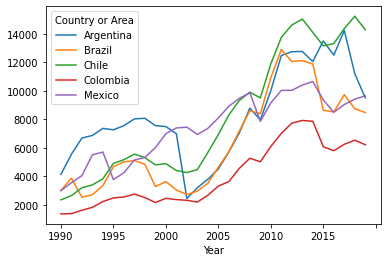

<matplotlib.axes._subplots.AxesSubplot at 0x7f4d57b14af0>

In [0]:
plot_paises.plot()

Out[407]:

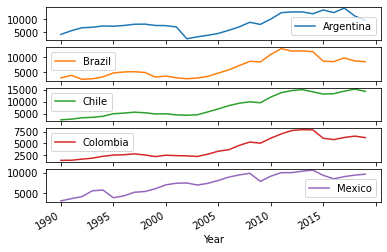

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d23f58ca0>,
 <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d57a80790>,
 <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d57aa1a00>,
 <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d29ed9b80>,
 <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d28169d00>],
 dtype=object)

In [0]:
plot_paises.plot(subplots=True)


In [0]:
df.rename(columns = {'Country or Area':'Country_or_Area'}, inplace = True)


In [0]:
dbutils.fs.mkdirs('/FileStore/tables/output/')

Out[423]: True

In [0]:
output_path = '/FileStore/tables/output/'

In [0]:
df.to_parquet('GNIperCapita.parquet.gzip',compression='gzip')

In [0]:
GNIperCap = pd.read_parquet('GNIperCapita.parquet.gzip')

display(GNIperCap)

Country_or_Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Afghanistan,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,436.826860989416,544.260065037087,590.518169999352,642.882195510742,639.388564512313,613.785652385012,583.69585593898,514.2931142718049,526.726154300307,498.881482609395,515.164559368834
Albania,616.652320280708,329.944388154053,190.042370963492,377.783404126391,590.718709083414,764.2816619385361,1032.6415764172,733.374997515199,838.4281923818401,1057.39162032858,1161.12101517968,1330.25744466619,1466.90166151345,1902.6842181460397,2431.59178308901,2731.5855174386897,3060.6353287413203,3695.1443275125102,4389.13480570284,4048.4293905764703,4053.2564257134495,4438.21543831371,4216.23395165702,4489.1551374331,4620.9667682912295,3999.3795632255396,4191.20822468344,4542.86721633724,5278.38344216565,5282.56376341776
Algeria,2320.64902884872,1635.11264555683,1696.1205161583403,1744.00423583686,1446.37666004846,1376.1161569804801,1516.46561491707,1545.1667582803698,1529.76265605758,1513.5671194368601,1677.7217831114901,1686.87350840151,1711.8210765423,2019.69762710427,2499.83468888537,2959.60989006709,3340.93263054883,3888.7972334028996,4888.410004571921,3845.9823792122997,4468.50159762034,5404.607757951871,5487.6348261841995,5380.10141953324,5370.52028488024,4075.49811853855,3906.88395535905,4048.6707602021397,4049.0651541253997,3876.41001686534
American Samoa,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Andorra,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Angola,846.2534870078031,865.69272959239,276.362844614739,247.612622743932,143.906652704244,342.160020082073,404.81851313737997,452.583113930496,360.52123049103795,301.31293933776,454.316555272224,435.21680241651603,779.1890817504691,887.688242020688,1122.89806061036,1695.0037412388501,2292.97114338239,2758.49888387067,3448.66951105581,2819.7225251601003,3241.6439618359004,4215.09408587855,4685.017846955529,4874.341881571359,5079.92803234544,3955.1213242306703,3323.2286023769398,3844.08811789204,3035.52112098076,2554.5528421120102
Antigua and Barbuda,6623.34385306494,7093.714510824359,7284.1248749796805,7787.4794690703,8375.548633568991,8015.46850476514,8657.334175695942,9183.071557555551,9652.87640967746,9946.63222560483,10285.3541554604,10046.2795075031,9872.08350185552,10311.475409836099,10887.3269305952,12041.0328452801,13432.477626591599,14996.4517155625,15328.2472842528,13574.2205212152,12734.353463292,12353.3318311533,12834.1405702399,12487.303980846102,12845.211667141,13386.0437812043,14170.3745568837,14558.170938238998,15863.1645645409,16291.609810318301
Arab World,2058.10370841202,1920.7311872330802,2023.24523064147,2005.2232155413199,1989.04499760709,2103.9922696914,2254.11229849557,2331.92900586904,2223.60301640535,2322.25103235825,2561.39984903159,2480.40962386221,2457.53653259487,2704.78101638977,3124.05393202609,3742.4957386910496,4374.02452010945,5005.43042176322,6176.4072425840295,5174.87560854763,5897.32156566448,6811.63884316192,7423.01908119183,7499.099014374599,7455.034104435191,6423.31067013304,6152.54135922349,6151.16386874773,6609.2957390804395,6597.7156707286495
Argentina,4143.335880142539,5558.12946753313,6696.54320079364,6880.86249888506,7375.68474623134,7274.6541291144495,7565.25198024625,8038.75131883457,8084.14415821843,7570.066905021379,7503.39201872746,7001.083927385091,2461.7697292315697,3214.9857238488503,3802.3925694727795,4529.18727072221,5722.45734194196,7054.07145757332,8795.47003805883,7970.24181200883,10029.306306376,12483.5582639325,12753.098962023001,12768.313688847,12062.616769481101,13508.4194130991,12510.542821618501,14241.1414047646,11215.0368809049,9515.3872085

In [0]:
# Create a Spark DataFrame from a pandas DataFrame using Arrow
spark.conf.set("spark.sql.execution.arrow.enabled", "true")


In [0]:
parquetdf = spark.createDataFrame(GNIperCap)

In [0]:
display(parquetdf)

Country_or_Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Afghanistan,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,436.826860989416,544.260065037087,590.518169999352,642.882195510742,639.388564512313,613.785652385012,583.69585593898,514.2931142718049,526.726154300307,498.881482609395,515.164559368834
Albania,616.652320280708,329.944388154053,190.042370963492,377.783404126391,590.718709083414,764.2816619385361,1032.6415764172,733.374997515199,838.4281923818401,1057.39162032858,1161.12101517968,1330.25744466619,1466.90166151345,1902.6842181460397,2431.59178308901,2731.5855174386897,3060.6353287413203,3695.1443275125102,4389.13480570284,4048.4293905764703,4053.2564257134495,4438.21543831371,4216.23395165702,4489.1551374331,4620.9667682912295,3999.3795632255396,4191.20822468344,4542.86721633724,5278.38344216565,5282.56376341776
Algeria,2320.64902884872,1635.11264555683,1696.1205161583403,1744.00423583686,1446.37666004846,1376.1161569804801,1516.46561491707,1545.1667582803698,1529.76265605758,1513.5671194368601,1677.7217831114901,1686.87350840151,1711.8210765423,2019.69762710427,2499.83468888537,2959.60989006709,3340.93263054883,3888.7972334028996,4888.410004571921,3845.9823792122997,4468.50159762034,5404.607757951871,5487.6348261841995,5380.10141953324,5370.52028488024,4075.49811853855,3906.88395535905,4048.6707602021397,4049.0651541253997,3876.41001686534
American Samoa,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Andorra,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Angola,846.2534870078031,865.69272959239,276.362844614739,247.612622743932,143.906652704244,342.160020082073,404.81851313737997,452.583113930496,360.52123049103795,301.31293933776,454.316555272224,435.21680241651603,779.1890817504691,887.688242020688,1122.89806061036,1695.0037412388501,2292.97114338239,2758.49888387067,3448.66951105581,2819.7225251601003,3241.6439618359004,4215.09408587855,4685.017846955529,4874.341881571359,5079.92803234544,3955.1213242306703,3323.2286023769398,3844.08811789204,3035.52112098076,2554.5528421120102
Antigua and Barbuda,6623.34385306494,7093.714510824359,7284.1248749796805,7787.4794690703,8375.548633568991,8015.46850476514,8657.334175695942,9183.071557555551,9652.87640967746,9946.63222560483,10285.3541554604,10046.2795075031,9872.08350185552,10311.475409836099,10887.3269305952,12041.0328452801,13432.477626591599,14996.4517155625,15328.2472842528,13574.2205212152,12734.353463292,12353.3318311533,12834.1405702399,12487.303980846102,12845.211667141,13386.0437812043,14170.3745568837,14558.170938238998,15863.1645645409,16291.609810318301
Arab World,2058.10370841202,1920.7311872330802,2023.24523064147,2005.2232155413199,1989.04499760709,2103.9922696914,2254.11229849557,2331.92900586904,2223.60301640535,2322.25103235825,2561.39984903159,2480.40962386221,2457.53653259487,2704.78101638977,3124.05393202609,3742.4957386910496,4374.02452010945,5005.43042176322,6176.4072425840295,5174.87560854763,5897.32156566448,6811.63884316192,7423.01908119183,7499.099014374599,7455.034104435191,6423.31067013304,6152.54135922349,6151.16386874773,6609.2957390804395,6597.7156707286495
Argentina,4143.335880142539,5558.12946753313,6696.54320079364,6880.86249888506,7375.68474623134,7274.6541291144495,7565.25198024625,8038.75131883457,8084.14415821843,7570.066905021379,7503.39201872746,7001.083927385091,2461.7697292315697,3214.9857238488503,3802.3925694727795,4529.18727072221,5722.45734194196,7054.07145757332,8795.47003805883,7970.24181200883,10029.306306376,12483.5582639325,12753.098962023001,12768.313688847,12062.616769481101,13508.4194130991,12510.542821618501,14241.1414047646,11215.0368809049,9515.3872085

In [0]:
parquetdf.write.mode('overwrite').parquet(output_path)

In [0]:
dbutils.fs.ls(output_path)

Out[431]: [FileInfo(path='dbfs:/FileStore/tables/output/_SUCCESS', name='_SUCCESS', size=0),
 FileInfo(path='dbfs:/FileStore/tables/output/_committed_1036301894613854198', name='_committed_1036301894613854198', size=424),
 FileInfo(path='dbfs:/FileStore/tables/output/_started_1036301894613854198', name='_started_1036301894613854198', size=0),
 FileInfo(path='dbfs:/FileStore/tables/output/part-00000-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-484-1-c000.snappy.parquet', name='part-00000-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-484-1-c000.snappy.parquet', size=22821),
 FileInfo(path='dbfs:/FileStore/tables/output/part-00001-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-485-1-c000.snappy.parquet', name='part-00001-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-485-1-c000.snappy.parquet', size=23079),
 FileInfo(path='dbfs:/FileStore/tables/output/part-00002-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-486-1-c000.snappy.parquet', name='part-00002-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-486-1-c000.snappy.parquet', size=23214),
 FileInfo(path='dbfs:/FileStore/tables/output/part-00003-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-487-1-c000.snappy.parquet', name='part-00003-tid-1036301894613854198-cdd1ce98-01f4-4eea-9867-0f877ac1604e-487-1-c000.snappy.parquet', size=22508)]

In [0]:
%sh
pip install sqlalchemy

Collecting sqlalchemy
 Downloading SQLAlchemy-1.4.12-cp38-cp38-manylinux2014_x86_64.whl (1.5 MB)
Collecting greenlet!=0.4.17; python_version >= "3"
 Downloading greenlet-1.0.0-cp38-cp38-manylinux2010_x86_64.whl (165 kB)
Installing collected packages: greenlet, sqlalchemy
Successfully installed greenlet-1.0.0 sqlalchemy-1.4.12
WARNING: You are using pip version 20.2.4; however, version 21.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
%sh
pip install pymysql



Collecting pymysql
 Downloading PyMySQL-1.0.2-py3-none-any.whl (43 kB)
Installing collected packages: pymysql
Successfully installed pymysql-1.0.2
WARNING: You are using pip version 20.2.4; however, version 21.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
from sqlalchemy import create_engine
import pymysql

In [0]:
#Create an in-memory SQLite database.
engine = create_engine('sqlite://', echo=False)

In [0]:
df.to_sql('GNI',con=engine)

In [0]:
engine.execute("SELECT * FROM GNI").fetchall()

Out[441]: [(0, 'Afghanistan', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 436.826860989416, 544.260065037087, 590.518169999352, 642.882195510742, 639.388564512313, 613.785652385012, 583.69585593898, 514.2931142718049, 526.726154300307, 498.881482609395, 515.164559368834),
 (1, 'Albania', 616.652320280708, 329.944388154053, 190.042370963492, 377.783404126391, 590.718709083414, 764.2816619385361, 1032.6415764172, 733.374997515199, 838.4281923818401, 1057.39162032858, 1161.12101517968, 1330.25744466619, 1466.90166151345, 1902.6842181460397, 2431.59178308901, 2731.5855174386897, 3060.6353287413203, 3695.1443275125102, 4389.13480570284, 4048.4293905764703, 4053.2564257134495, 4438.21543831371, 4216.23395165702, 4489.1551374331, 4620.9667682912295, 3999.3795632255396, 4191.20822468344, 4542.86721633724, 5278.38344216565, 5282.56376341776),
 (2, 'Algeria', 2320.64902884872, 1635.11264555683, 1696.1205161583403, 1744.00423583686, 1446.37666004846, 1376.1161569804801, 1516.46561491707, 1545.1667582803698, 1529.76265605758, 1513.5671194368601, 1677.7217831114901, 1686.87350840151, 1711.8210765423, 2019.69762710427, 2499.83468888537, 2959.60989006709, 3340.93263054883, 3888.7972334028996, 4888.410004571921, 3845.9823792122997, 4468.50159762034, 5404.607757951871, 5487.6348261841995, 5380.10141953324, 5370.52028488024, 4075.49811853855, 3906.88395535905, 4048.6707602021397, 4049.0651541253997, 3876.41001686534),
 (3, 'American Samoa', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None),
 (4, 'Andorra', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None),
 (5, 'Angola', 846.2534870078031, 865.69272959239, 276.362844614739, 247.612622743932, 143.906652704244, 342.160020082073, 404.81851313737997, 452.583113930496, 360.52123049103795, 301.31293933776, 454.316555272224, 435.21680241651603, 779.1890817504691, 887.688242020688, 1122.89806061036, 1695.0037412388501, 2292.97114338239, 2758.49888387067, 3448.66951105581, 2819.7225251601003, 3241.6439618359004, 4215.09408587855, 4685.017846955529, 4874.341881571359, 5079.92803234544, 3955.1213242306703, 3323.2286023769398, 3844.08811789204, 3035.52112098076, 2554.5528421120102),
 (6, 'Antigua and Barbuda', 6623.34385306494, 7093.714510824359, 7284.1248749796805, 7787.4794690703, 8375.548633568991, 8015.46850476514, 8657.334175695942, 9183.071557555551, 9652.87640967746, 9946.63222560483, 10285.3541554604, 10046.2795075031, 9872.08350185552, 10311.475409836099, 10887.3269305952, 12041.0328452801, 13432.477626591599, 14996.4517155625, 15328.2472842528, 13574.2205212152, 12734.353463292, 12353.3318311533, 12834.1405702399, 12487.303980846102, 12845.211667141, 13386.0437812043, 14170.3745568837, 14558.170938238998, 15863.1645645409, 16291.609810318301),
 (7, 'Arab World', 2058.10370841202, 1920.7311872330802, 2023.24523064147, 2005.2232155413199, 1989.04499760709, 2103.9922696914, 2254.11229849557, 2331.92900586904, 2223.60301640535, 2322.25103235825, 2561.39984903159, 2480.40962386221, 2457.53653259487, 2704.78101638977, 3124.05393202609, 3742.4957386910496, 4374.02452010945, 5005.43042176322, 6176.4072425840295, 5174.87560854763, 5897.32156566448, 6811.63884316192, 7423.01908119183, 7499.099014374599, 7455.034104435191, 6423.31067013304, 6152.54135922349, 6151.16386874773, 6609.2957390804395, 6597.7156707286495),
 (8, 'Argentina', 4143.335880142539, 5558.12946753313, 6696.54320079364, 6880.86249888506, 7375.68474623134, 7274.6541291144495, 7565.25198024625, 8038.75131883457, 8084.14415821843, 7570.066905021379, 7503.39201872746, 7001.083927385091, 2461.7697292315697, 3214.9857238488503, 3802.3925694727795, 4529.18727072221, 5722.45734194196, 7054.07145757332, 8795.47003805883, 797